In [1]:
# %pip install pandas==2.2.3 matplotlib==3.9.3

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Bài tập 2: Hãy tiến hành xử lý, làm sạch bộ dữ liệu Raw_credits và tìm ra các thông tin sau:
# Điểm số trung bình imdb_score của tất cả các bộ phim là bao nhiêu? Của từng thể loại là bao nhiêu?
# Số lượng imdb votes của tất cả các bộ phim và của riêng từng thể loại
# Tìm ra số lượng trung bình imdb_votes và imdb_score theo từng năm release
# Hãy suy luận xem liệu có mối liên hệ nào giữa imdb_votes, imdb_score với năm release không?

In [4]:
# Đọc dữ liệu
df = pd.read_csv('raw_titles.csv')
df

,index,id,title,type,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes
0,0,ts300399,Five Came Back: The Reference Films,SHOW,1945,TV-MA,48,['documentation'],['US'],1.0,NaN,NaN,NaN
1,1,tm84618,Taxi Driver,MOVIE,1976,R,113,"['crime', 'drama']",['US'],NaN,tt0075314,8.3,795222.0
2,2,tm127384,Monty Python and the Holy Grail,MOVIE,1975,PG,91,"['comedy', 'fantasy']",['GB'],NaN,tt0071853,8.2,530877.0
3,3,tm70993,Life of Brian,MOVIE,1979,R,94,['comedy'],['GB'],NaN,tt0079470,8.0,392419.0
4,4,tm190788,The Exorcist,MOVIE,1973,R,133,['horror'],['US'],NaN,tt0070047,8.1,391942.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5801,5801,tm1014599,Fine Wine,MOVIE,2021,NaN,100,"['romance', 'drama']",['NG'],NaN,tt13857480,6.9,39.0
5802,5802,tm1108171,Edis Starlight,MOVIE,2021,NaN,74,"['music', 'documentation']",[],NaN,NaN,NaN,NaN
5803,5803,tm1045018,Clash,MOVIE,2021,NaN,88,"['family', 'drama']","['NG', 'CA']",NaN,tt14620732,6.5,32.0
5804,5804,tm1098060,Shadow Parties,MOVIE,2021,NaN,116,"['action', 'thriller']",[],NaN,tt10168094,6.2,9.0


In [5]:
df.columns

Index(['index', 'id', 'title', 'type', 'release_year', 'age_certification',
       'runtime', 'genres', 'production_countries', 'seasons', 'imdb_id',
       'imdb_score', 'imdb_votes'],
      dtype='object')

In [6]:
# Xử lý dữ liệu cột imdb_score và imdb_votes
print('So luong gia tri khuyet thieu tren cot imdb_score', df['imdb_score'].isna().sum())
print('So luong gia tri khuyet thieu tren cot imdb_votes', df['imdb_votes'].isna().sum())

So luong gia tri khuyet thieu tren cot imdb_score 523
So luong gia tri khuyet thieu tren cot imdb_votes 539


In [7]:
# # Cách 1: Loại bỏ các dòng có giá trị khuyết thiếu trên cột imdb_score và imdb_votes
# df = df.dropna(subset=['imdb_score'])
# df = df.dropna(subset=['imdb_votes'])

In [8]:
# Cách 2: Thay thế giá trị khuyết thiếu
# trên cột imdb_score bằng giá trị trung bình của cột imdb_score và imdb_votes
df['imdb_score'] = df['imdb_score'].fillna(df['imdb_score'].dropna().mean())
df['imdb_votes'] = df['imdb_votes'].fillna(df['imdb_votes'].dropna().mean())

In [9]:
# Format dữ liệu cột genres thành list
df['genres'] = df['genres'].apply(eval)
df

,index,id,title,type,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes
0,0,ts300399,Five Came Back: The Reference Films,SHOW,1945,TV-MA,48,[documentation],['US'],1.0,NaN,6.533447,23407.194988
1,1,tm84618,Taxi Driver,MOVIE,1976,R,113,"[crime, drama]",['US'],NaN,tt0075314,8.300000,795222.000000
2,2,tm127384,Monty Python and the Holy Grail,MOVIE,1975,PG,91,"[comedy, fantasy]",['GB'],NaN,tt0071853,8.200000,530877.000000
3,3,tm70993,Life of Brian,MOVIE,1979,R,94,[comedy],['GB'],NaN,tt0079470,8.000000,392419.000000
4,4,tm190788,The Exorcist,MOVIE,1973,R,133,[horror],['US'],NaN,tt0070047,8.100000,391942.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5801,5801,tm1014599,Fine Wine,MOVIE,2021,NaN,100,"[romance, drama]",['NG'],NaN,tt13857480,6.900000,39.000000
5802,5802,tm1108171,Edis Starlight,MOVIE,2021,NaN,74,"[music, documentation]",[],NaN,NaN,6.533447,23407.194988
5803,5803,tm1045018,Clash,MOVIE,2021,NaN,88,"[family, drama]","['NG', 'CA']",NaN,tt14620732,6.500000,32.000000
5804,5804,tm1098060,Shadow Parties,MOVIE,2021,NaN,116,"[action, thriller]",[],NaN,tt10168094,6.200000,9.000000


In [10]:
# Điểm số trung bình imdb_score của tất cả các bộ phim là bao nhiêu? Của từng thể loại là bao nhiêu?

In [11]:
print('Điểm số trung bình imdb_score của tất cả các bộ phim:', df['imdb_score'].mean())

Điểm số trung bình imdb_score của tất cả các bộ phim: 6.533446905167518


In [12]:
explode_genre_df = df.explode('genres')
explode_genre_df

,index,id,title,type,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes
0,0,ts300399,Five Came Back: The Reference Films,SHOW,1945,TV-MA,48,documentation,['US'],1.0,NaN,6.533447,23407.194988
1,1,tm84618,Taxi Driver,MOVIE,1976,R,113,crime,['US'],NaN,tt0075314,8.300000,795222.000000
1,1,tm84618,Taxi Driver,MOVIE,1976,R,113,drama,['US'],NaN,tt0075314,8.300000,795222.000000
2,2,tm127384,Monty Python and the Holy Grail,MOVIE,1975,PG,91,comedy,['GB'],NaN,tt0071853,8.200000,530877.000000
2,2,tm127384,Monty Python and the Holy Grail,MOVIE,1975,PG,91,fantasy,['GB'],NaN,tt0071853,8.200000,530877.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5804,5804,tm1098060,Shadow Parties,MOVIE,2021,NaN,116,action,[],NaN,tt10168094,6.200000,9.000000
5804,5804,tm1098060,Shadow Parties,MOVIE,2021,NaN,116,thriller,[],NaN,tt10168094,6.200000,9.000000
5805,5805,ts271048,Mighty Little Bheem: Kite Festival,SHOW,2021,NaN,0,family,[],1.0,tt13711094,8.800000,16.000000
5805,5805,ts271048,Mighty Little Bheem: Kite Festival,SHOW,2021,NaN,0,comedy,[],1.0,tt13711094,8.800000,16.000000


In [13]:
grouped_genre_df = explode_genre_df.groupby('genres')
grouped_genre_df

In [14]:
print('Điểm số trung bình imdb_score của từng thể loại:')
grouped_genre_df['imdb_votes'].mean()

Điểm số trung bình imdb_score của từng thể loại:


genres
action           38928.829102
animation        14231.888638
comedy           18101.492732
crime            35460.683170
documentation     7852.987361
drama            30621.180403
european         30531.120250
family           14474.972194
fantasy          32546.410031
history          28782.082382
horror           44492.445565
music            18935.823214
reality           3784.901008
romance          22548.032688
scifi            47148.625664
sport            25432.681898
thriller         46257.935810
war              53768.530033
western          97540.876931
Name: imdb_votes, dtype: float64

In [15]:
# Tìm ra số lượng trung bình imdb_votes và imdb_score theo từng năm release

In [16]:
grouped_year_df = df.groupby('release_year')

In [17]:
print('Số lượng trung bình imdb_votes theo từng năm release:')
grouped_year_df['imdb_votes'].mean()

Số lượng trung bình imdb_votes theo từng năm release:


release_year
1945    23407.194988
1953      231.000000
1954    21796.000000
1956      590.000000
1958     4385.000000
            ...     
2018    10084.509037
2019    13109.378407
2020    12474.765768
2021    11106.779445
2022     9173.461818
Name: imdb_votes, Length: 67, dtype: float64

In [18]:
print('Số lượng trung bình imdb_score theo từng năm release:')
grouped_year_df['imdb_score'].mean()

Số lượng trung bình imdb_score theo từng năm release:


release_year
1945    6.533447
1953    6.800000
1954    7.450000
1956    6.700000
1958    7.500000
          ...   
2018    6.530712
2019    6.527018
2020    6.379193
2021    6.339149
2022    6.306777
Name: imdb_score, Length: 67, dtype: float64

In [19]:
# Hãy suy luận xem liệu có mối liên hệ nào giữa imdb_votes, imdb_score với năm release không?

In [20]:
mean_votes_grouped_year_df = grouped_year_df['imdb_votes'].mean()
mean_votes_grouped_year_df

release_year
1945    23407.194988
1953      231.000000
1954    21796.000000
1956      590.000000
1958     4385.000000
            ...     
2018    10084.509037
2019    13109.378407
2020    12474.765768
2021    11106.779445
2022     9173.461818
Name: imdb_votes, Length: 67, dtype: float64

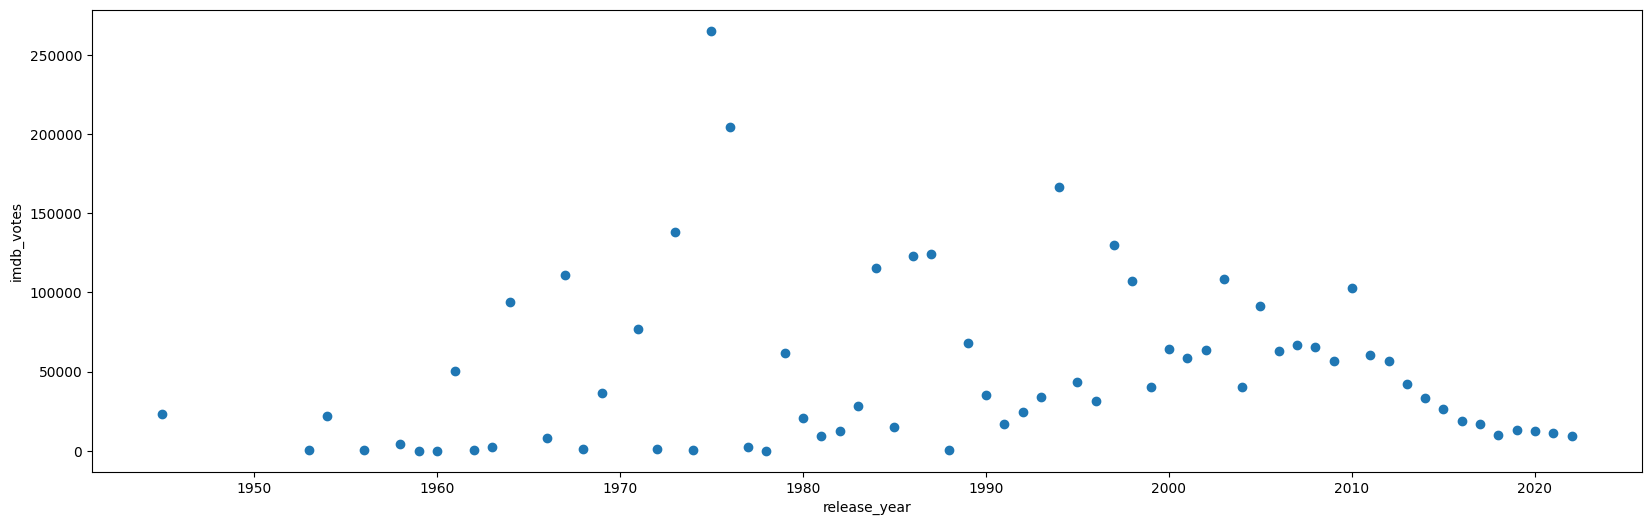

In [21]:
plt.figure(figsize=(20, 6))
plt.scatter(mean_votes_grouped_year_df.index, mean_votes_grouped_year_df)
plt.xlabel('release_year')
plt.ylabel('imdb_votes')
plt.savefig('imdb_votes.png')

In [22]:
mean_score_grouped_year_df = grouped_year_df['imdb_score'].mean()
mean_score_grouped_year_df

release_year
1945    6.533447
1953    6.800000
1954    7.450000
1956    6.700000
1958    7.500000
          ...   
2018    6.530712
2019    6.527018
2020    6.379193
2021    6.339149
2022    6.306777
Name: imdb_score, Length: 67, dtype: float64

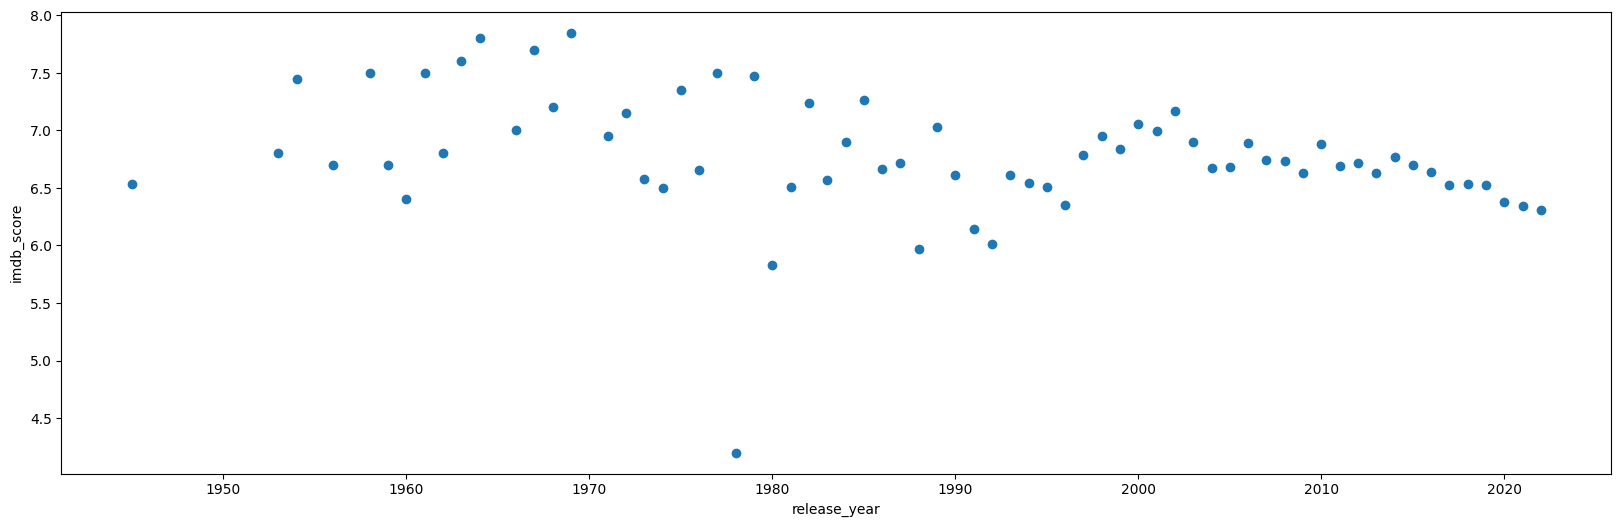

In [23]:
plt.figure(figsize=(20, 6))
plt.scatter(mean_score_grouped_year_df.index, mean_score_grouped_year_df)
plt.xlabel('release_year')
plt.ylabel('imdb_score')
plt.savefig('imdb_score.png')